# Logistic Regression with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Expoloratory data analysis

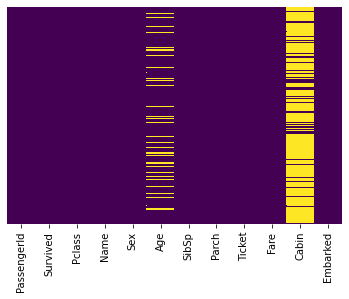

In [7]:
# using heatmap to look for missing/null data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

some age data missing and most of cabin data missing

In [9]:
sns.set_style('whitegrid')

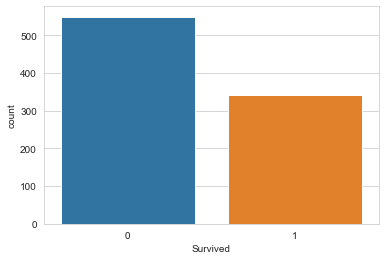

In [10]:
# counts of survival
sns.countplot(x='Survived',data=train)

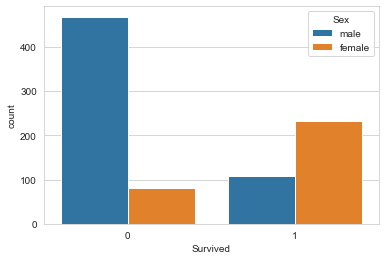

In [13]:
# survival with hue of sex
sns.countplot(x='Survived',data=train,hue='Sex')

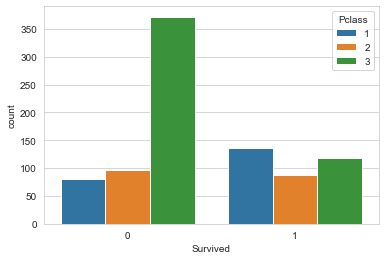

In [14]:
# survival with hue of passenger class
sns.countplot(x='Survived',data=train,hue='Pclass')

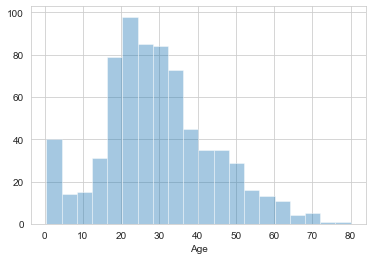

In [16]:
# histogram of age distribution
sns.distplot(train['Age'].dropna(),kde=False)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


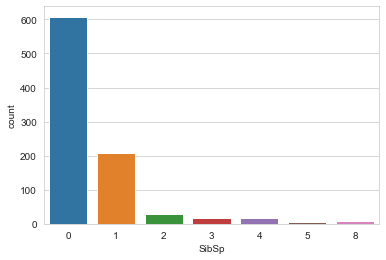

In [21]:
# siblings/spouse on board
sns.countplot(x='SibSp',data=train)

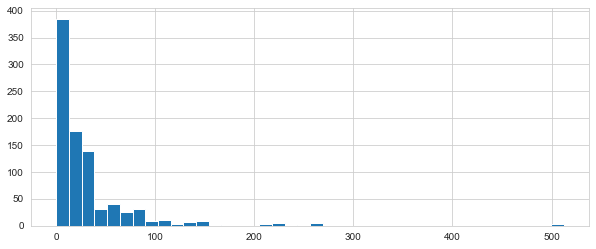

In [23]:
# distro of fare paid
train['Fare'].hist(bins=40,figsize=(10,4))

In [24]:
import cufflinks as cf
cf.go_offline()

In [25]:
train['Fare'].iplot(kind='hist',bins=30)

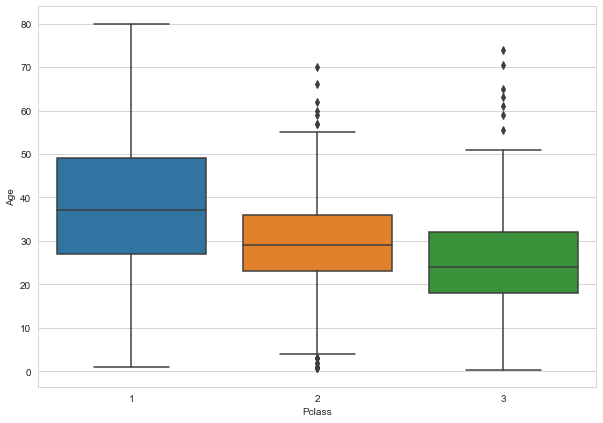

In [28]:
# looking at age based on passenger class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [31]:
# impute age column to fill out null values
# function to apply
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [32]:
# apply impute_age function to the age column
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

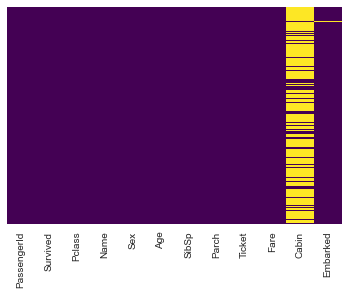

In [35]:
# age columns filled in successfully
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
# drop cabin columns, not info data to be useful
train.drop('Cabin',axis=1,inplace=True)

In [37]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [39]:
# drop rest of null values
train.dropna(inplace=True)

In [47]:
# creating dummy variable for sex
# one column to represent sex, 1 = male, 0 = female
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [48]:
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [49]:
# now doing creating a dummy variable for embark column
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [51]:
train = pd.concat([train,sex,embark],axis=1)

In [52]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [54]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [62]:
# now we have our dataframe in a good format
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [63]:
# passengerId not needed
# train.drop('PassengerId',axis=1,inplace=True)

In [61]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [64]:
# for the sake of learning, will be using the train dataframe as if it is all our data

In [68]:
# trying to predict who survived
X = train.drop('Survived',axis=1)
y = train['Survived']

In [66]:
from sklearn.model_selection import train_test_split

In [71]:
# creating test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression()

In [73]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [74]:
# predictions
predictions = logmodel.predict(X_test)

evaluating model

In [75]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,predictions))

precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)